In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_data, shift_gal, peak_detection, draw_images
import cosmos_params
import plot

***
**Note:**

Images simulated in this notebook are drawn supposing a number of exposures corresponding to the **full LSST and Euclid surveys**. There is just one PSF applied on the stack.

If you want to generate images for one single exposure, go to the file `cosmos_param.py` and change the `full_or_single` parameter to `'single'`.

***

**Fix parameters**

Data folder and which part of the catalog is used

In [3]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
data_dir = str(os.environ.get('IMGEN_DATA'))
cosmos_cat_dir = os.path.join(data_dir,'COSMOS_25.2_training_sample')

# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [4]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [6]:
res[2]

{'e1_fit_0': -0.5238330031215364,
 'e2_fit_0': 0.2269193573280937,
 'weight_fit_0': 467.87549703574246,
 'redshift_0': 0.48260000348091125,
 'moment_sigma_0': 2.030627489089966,
 'e1_ksb_0': -0.1574273407459259,
 'e2_ksb_0': -0.08764059096574783,
 'mag_0': 26.480644365281787,
 'nb_blended_gal': 1,
 'mag': 26.480644365281787,
 'mag_ir': -0.6104023094706408,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 52.80945274806976,
 'SNR_peak': 0.057841184680348594}

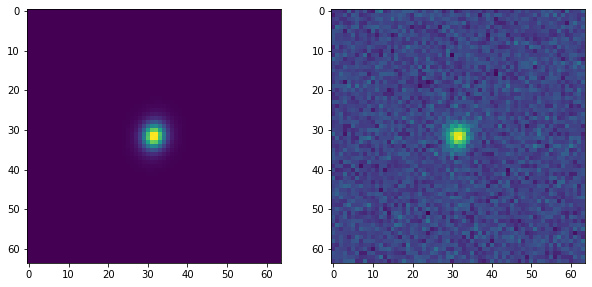

In [7]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [8]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [9]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [10]:
res[2]

{'e1_fit_0': -0.11651788490596414,
 'e2_fit_0': 0.6130987118524157,
 'weight_fit_0': 381.29559108657764,
 'e1_fit_1': -0.09258599132621212,
 'e2_fit_1': -0.1435005036882668,
 'weight_fit_1': 386.2026898311869,
 'e1_fit_2': 0.7965770682275887,
 'e2_fit_2': -0.42861675240070907,
 'weight_fit_2': 917.728182586992,
 'e1_fit_3': -0.05735228232653762,
 'e2_fit_3': 0.05068282260368757,
 'weight_fit_3': 365.32236297749773,
 'e1_fit_4': 0.23356450045042715,
 'e2_fit_4': 0.4472354724718268,
 'weight_fit_4': 336.67023090416916,
 'e1_fit_5': -0.2693204288581574,
 'e2_fit_5': -0.19288266226333084,
 'weight_fit_5': 408.9786032061232,
 'redshift_0': 0.4032000005245209,
 'moment_sigma_0': 1.8488247394561768,
 'e1_ksb_0': -0.5029740333557129,
 'e2_ksb_0': -0.10880615562200546,
 'mag_0': 27.370273751089393,
 'redshift_1': 2.5982000827789307,
 'moment_sigma_1': 1.5629963874816895,
 'e1_ksb_1': -0.08296144008636475,
 'e2_ksb_1': -0.3708904981613159,
 'mag_1': 26.98255321569632,
 'redshift_2': 1.0533000230

Display noiseless brightest galaxy and blend images

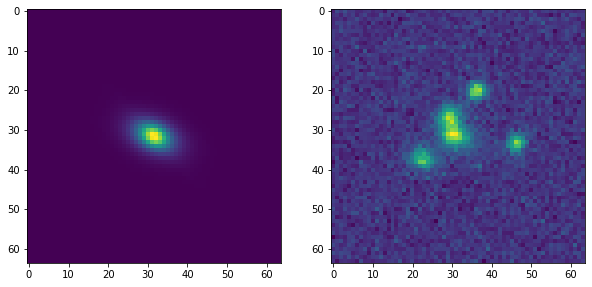

In [11]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

Display all noiseless galaxies

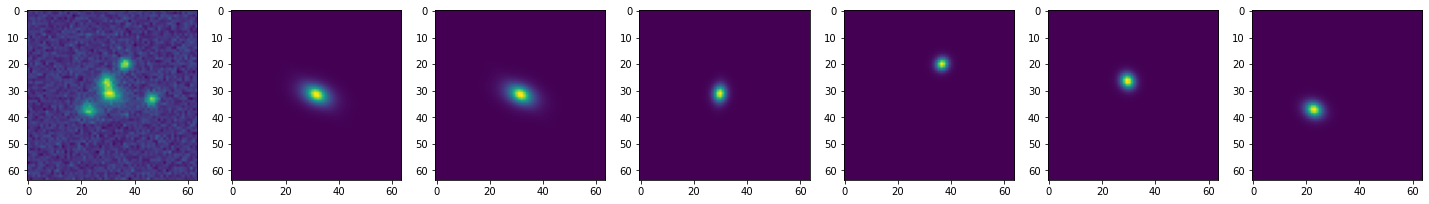

In [12]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the `nmax_blend` parameter to (2,5).

In [13]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [14]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [15]:
res[2]

{'e1_fit_0': -0.2068492536417815,
 'e2_fit_0': 0.2515605700990104,
 'weight_fit_0': 476.1633990356123,
 'e1_fit_1': -0.36987389303159557,
 'e2_fit_1': 0.38645205415240763,
 'weight_fit_1': 556.4123158124746,
 'e1_fit_2': -0.19910892903239483,
 'e2_fit_2': -0.25475927087219347,
 'weight_fit_2': 390.39729850161143,
 'e1_fit_3': -0.42560597241501913,
 'e2_fit_3': -0.25485180948004493,
 'weight_fit_3': 331.13811333558425,
 'e1_fit_4': nan,
 'e2_fit_4': nan,
 'weight_fit_4': nan,
 'redshift_0': 0.9174000024795532,
 'moment_sigma_0': 2.3007729053497314,
 'e1_ksb_0': -0.38573288917541504,
 'e2_ksb_0': 0.41015952825546265,
 'mag_0': 26.89053085049663,
 'redshift_1': 0.5812000036239624,
 'moment_sigma_1': 1.6041316986083984,
 'e1_ksb_1': 0.20470117032527924,
 'e2_ksb_1': -0.2691027820110321,
 'mag_1': 27.458935687387118,
 'redshift_2': 0.8658999800682068,
 'moment_sigma_2': 2.0385818481445312,
 'e1_ksb_2': 0.14300437271595,
 'e2_ksb_2': 0.22626954317092896,
 'mag_2': 26.818046671887373,
 'redsh

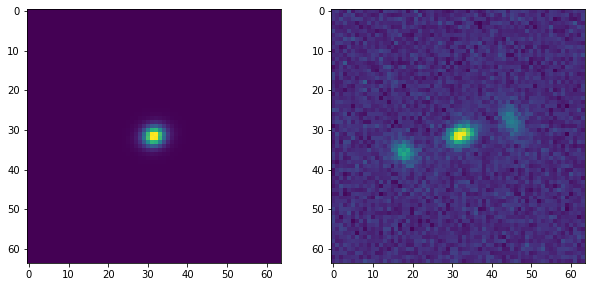

In [16]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

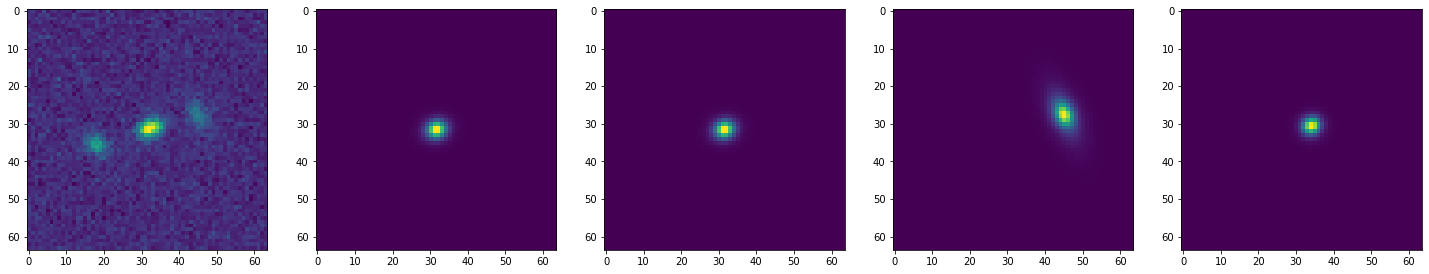

In [17]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Now if I change "training_or_test" into "training" (or validation), only the individual image of the first (and brightest is asked) galaxy added is created.

In [18]:
training_or_test = 'training' # training test validation

In [19]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [20]:
res[0].shape

(10, 64, 64)

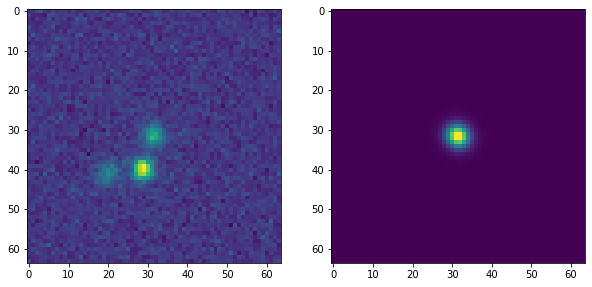

In [21]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[1][6])
ax[1].imshow(res[0][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter `center_brightest` is set to `False`, the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when `center_brightest` is set to `True`.

## Generate image of isolated galaxies

In [22]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [23]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [24]:
res[2]

{'mag_0': 25.8077012998437,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.963014841079712,
 'e1_0': 0.7993249297142029,
 'e2_0': 0.646591067314148,
 'nb_blended_gal': 1,
 'mag': 25.8077012998437,
 'mag_ir': -3.1922159316833003,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 50.277003896517954,
 'SNR_peak': 0.04220119016711164}

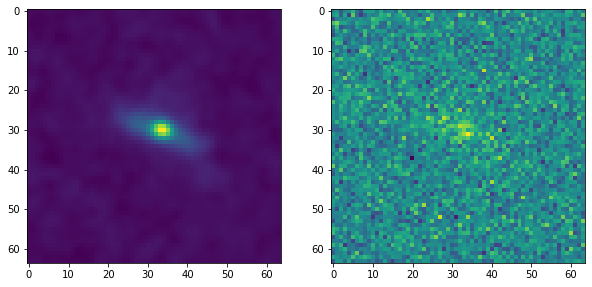

In [25]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [26]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [31]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [32]:
res[2]

{'mag_0': 22.967187608868233,
 'redshift_0': 0.0,
 'moment_sigma_0': 3.497976303100586,
 'e1_0': -0.10890553891658783,
 'e2_0': 0.1489533931016922,
 'mag_1': 25.094835527246225,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.240752696990967,
 'e1_1': -0.07648784667253494,
 'e2_1': -0.005966719705611467,
 'mag_2': 24.53273379076102,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.137660264968872,
 'e1_2': -0.2766572833061218,
 'e2_2': -0.1868346482515335,
 'mag_3': 25.79358584942764,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.6637864112854004,
 'e1_3': 0.040532466024160385,
 'e2_3': -0.07645151764154434,
 'mag_4': 25.57730203878637,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.8320364952087402,
 'e1_4': -0.6207063794136047,
 'e2_4': 0.3241792321205139,
 'mag_5': 23.425423332753475,
 'redshift_5': 0.0,
 'moment_sigma_5': 3.7452080249786377,
 'e1_5': -0.11908576637506485,
 'e2_5': -0.22762399911880493,
 'nb_blended_gal': 6,
 'mag': 22.967187608868233,
 'mag_ir': -3.912351804027275,
 'closest_mag': 24.532733

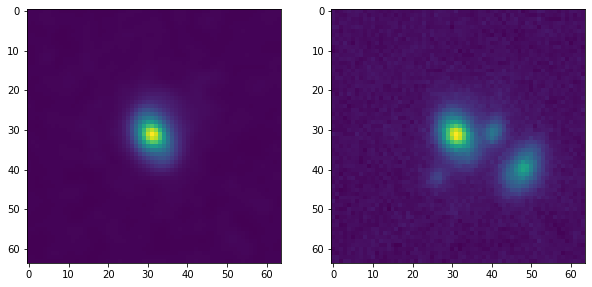

In [33]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

Now display all noiseless galaxy images

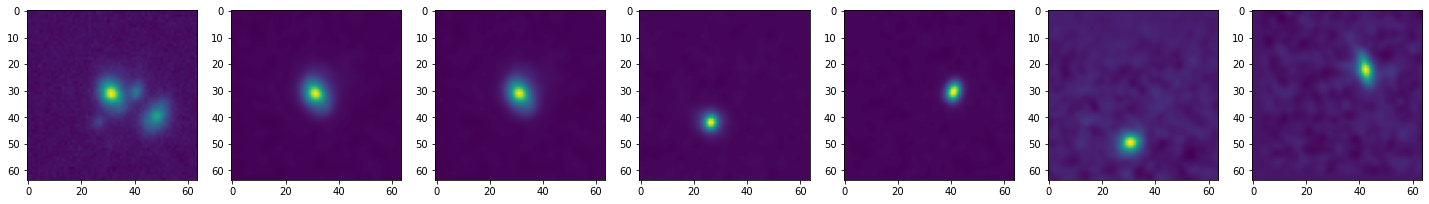

In [34]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Test generating a "validation" dataset

In [35]:
training_or_test = 'validation' # training test validation

In [36]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [39]:
res[0].shape

(10, 64, 64)

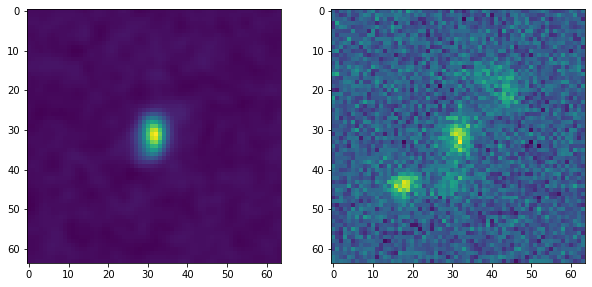

In [38]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 32 and 96 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [27]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

## With simulations

In [28]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [29]:
res[2]

{'e1_fit_0': -0.25766792267575855,
 'e2_fit_0': 0.22765617062631552,
 'weight_fit_0': 259.74625698950837,
 'e1_fit_1': 0.47849039186066183,
 'e2_fit_1': 0.11686602094537915,
 'weight_fit_1': 297.43638360490576,
 'e1_fit_2': 0.5915055703507751,
 'e2_fit_2': 0.4174116044449399,
 'weight_fit_2': 375.8860901582231,
 'e1_fit_3': -0.09692177906582938,
 'e2_fit_3': 0.2239518831251995,
 'weight_fit_3': 377.7195968191811,
 'e1_fit_4': -0.5093921837859922,
 'e2_fit_4': -0.10604594098648976,
 'weight_fit_4': 351.07747588532544,
 'e1_fit_5': 0.41670952066283634,
 'e2_fit_5': 0.44925567157835633,
 'weight_fit_5': 586.1152395347226,
 'e1_fit_6': -0.009087149854649455,
 'e2_fit_6': 0.030224050831285352,
 'weight_fit_6': 433.6060189065118,
 'e1_fit_7': -0.055624251378030426,
 'e2_fit_7': -0.6506825464894915,
 'weight_fit_7': 458.96296022403106,
 'e1_fit_8': 0.23414356531614655,
 'e2_fit_8': -0.43640668999145804,
 'weight_fit_8': 360.9233363851419,
 'e1_fit_9': 0.26418228464895566,
 'e2_fit_9': 0.13475

In [30]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

70 galaxies are added to this image.


Here `res[0]` is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter `center_brightest` to `False`.

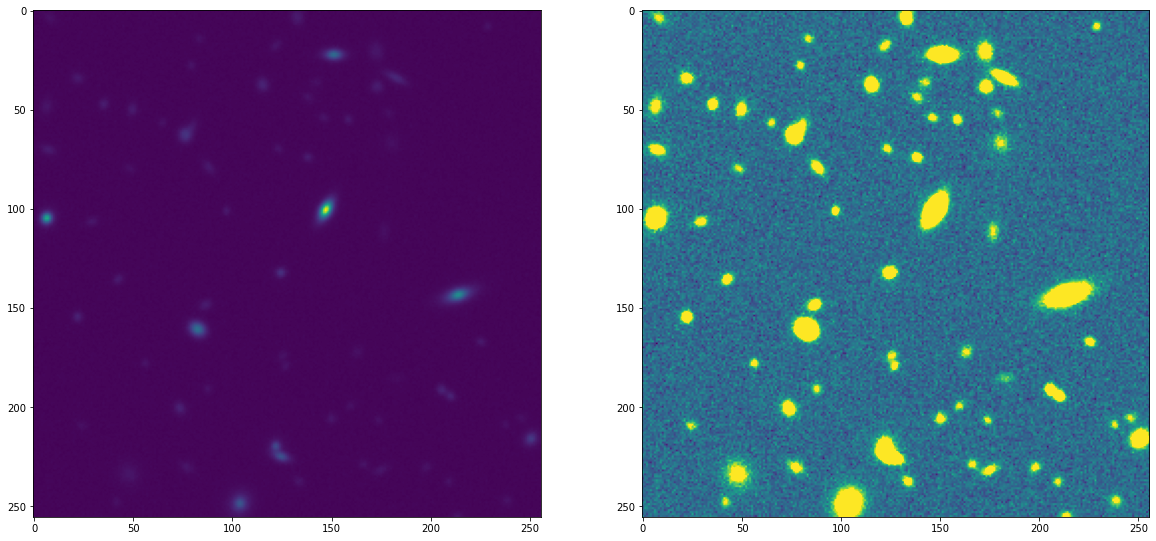

In [31]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the `plot_rgb` function of the `plot.py` module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


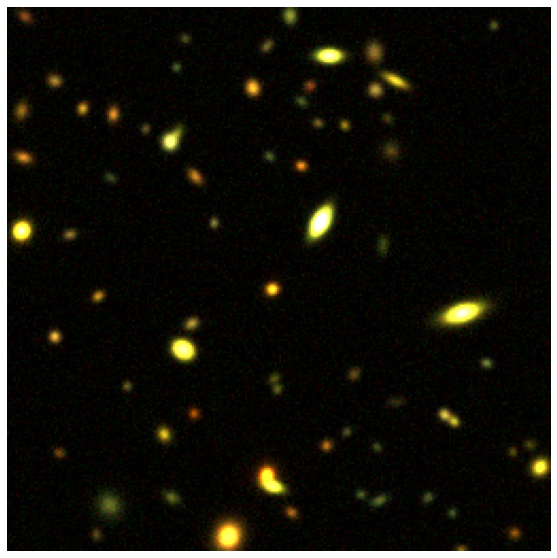

In [32]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


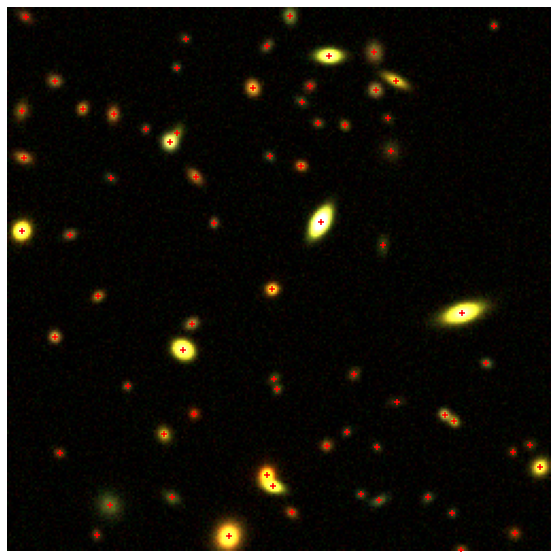

In [33]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [34]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [35]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [36]:
res[2]

{'mag_0': 23.981553189648324,
 'redshift_0': 0.0,
 'moment_sigma_0': 1.8452802896499634,
 'e1_0': 0.047427888959646225,
 'e2_0': -0.05499343201518059,
 'mag_1': 23.456488992491813,
 'redshift_1': 0.0,
 'moment_sigma_1': 1.9139361381530762,
 'e1_1': 0.3532525897026062,
 'e2_1': 0.6537351012229919,
 'mag_2': 23.38298981142764,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.5030713081359863,
 'e1_2': 0.023001307621598244,
 'e2_2': 1.0049954652786255,
 'mag_3': 23.8693832531119,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.5765552520751953,
 'e1_3': 0.09591492265462875,
 'e2_3': 0.1162971556186676,
 'mag_4': 23.397747813168895,
 'redshift_4': 0.0,
 'moment_sigma_4': 3.759077548980713,
 'e1_4': -0.30802100896835327,
 'e2_4': -0.1268806755542755,
 'mag_5': 23.93730033180003,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.486307144165039,
 'e1_5': 0.1474943906068802,
 'e2_5': -0.22041165828704834,
 'mag_6': 20.694282616455688,
 'redshift_6': 0.0,
 'moment_sigma_6': 2.2012414932250977,
 'e1_6': -0.53061908483

In [37]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

88 galaxies are added to this image.


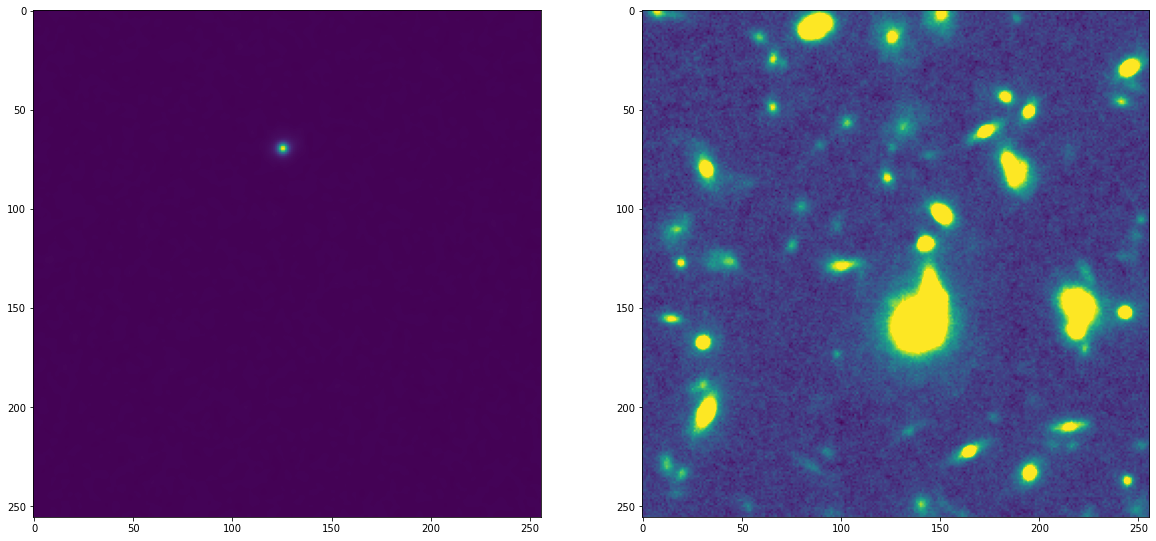

In [38]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6], vmax = 10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


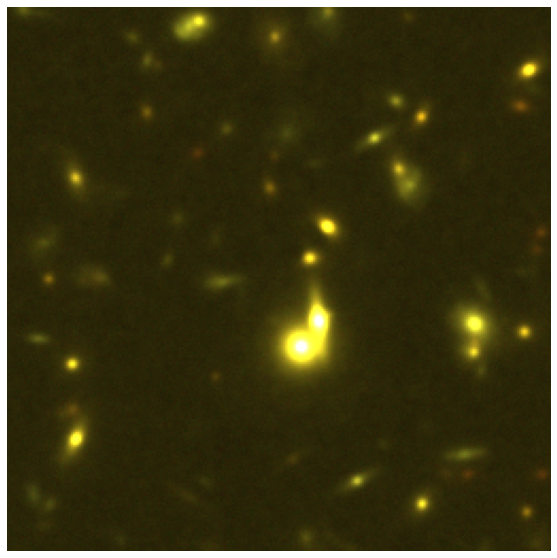

In [39]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


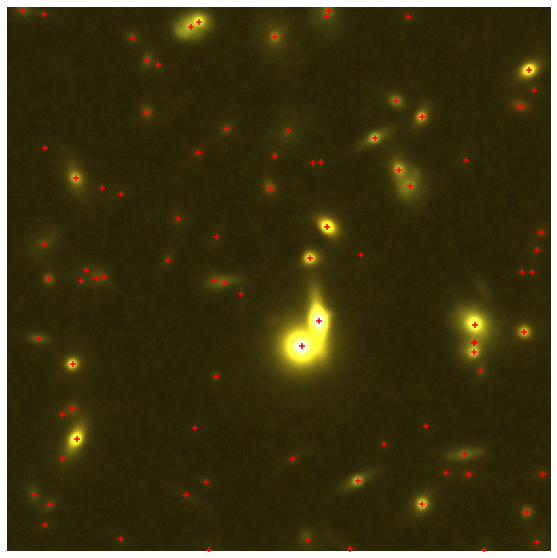

In [40]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)